<a href="https://colab.research.google.com/github/ksen0byte/conference-may-2025/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D1%87%D0%B0%D1%81%D1%83_%D1%81%D0%B5%D0%BD%D1%81%D0%BE%D0%BC%D0%BE%D1%82%D0%BE%D1%80%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B0%D0%BA%D1%86%D1%96%D1%97_%D1%81%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D1%96%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналіз часу сенсомоторної реакції студентів
*Демонстраційний приклад для конференції*

## 📌 Опис
У цьому ноутбуці представлено приклад аналізу симульованих даних простої сенсомоторної реакції (ПСМР) у двох груп студентів (A і B) віком 18–25 років.
Дані аналізуються засобами Python у середовищі Google Colab. Формули оформлено у LaTeX, візуалізація здійснюється через matplotlib.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [26]:
np.random.seed(42)

group_A = np.random.normal(loc=245, scale=15, size=30)
group_B = np.random.normal(loc=293, scale=35, size=30)

df = pd.DataFrame({
    'reaction_time': np.concatenate([group_A, group_B]),
    'group': ['A'] * 30 + ['B'] * 30
})

df

,reaction_time,group
0,252.450712,A
1,242.926035,A
2,254.715328,A
3,267.845448,A
4,241.487699,A
5,241.487946,A
6,268.688192,A
7,256.511521,A
8,237.957884,A
9,253.138401,A


In [24]:
summary = df.groupby('group')['reaction_time'].agg(['mean', 'median', 'std'])
summary['cv (%)'] = (summary['std'] / summary['mean']) * 100
summary


,mean,median,std,cv (%)
group,,,,
A,242.177797,241.487823,13.500096,5.574457
B,288.759314,290.739954,32.588577,11.285723


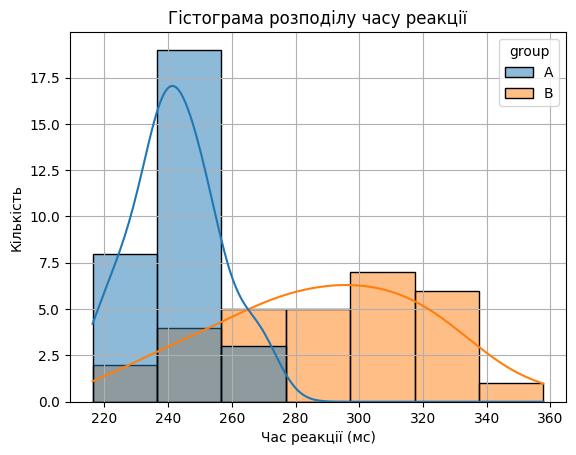

In [21]:
sns.histplot(data=df, x='reaction_time', hue='group', bins='sturges', kde=True)
plt.title('Гістограма розподілу часу реакції')
plt.xlabel('Час реакції (мс)')
plt.ylabel('Кількість')
plt.grid(True)
plt.show()


In [22]:
t_stat, p_value = stats.ttest_ind(group_A, group_B)
print(f"t = {t_stat:.2f}, p = {p_value:.5f}")


t = -7.23, p = 0.00000
